# Analysis 3 - Monthly Distribution of Total Headlines over last 5 years

# create files, fetch json data from url and load json data into files

In [2]:
import os
years = ['2012','2013','2014','2015','2016']
dataDir = '/Users/prashantverma/Documents/Python/final/data/'

# function to count  Number of headlines in a month

In [3]:
def getHeadlineFreq (file):
    snippets = []
    with open(file) as infile:
        data = json.load(infile)
        lenth = len(data['response']['docs'])
        for i in range(lenth):
            snippets.append(data['response']['docs'][i]['snippet'])
    
    
    count = 0
    for snippet in snippets:
        count += 1
    
    return count

In [38]:
import requests,json
import glob
import datetime

Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec = ([] for i in range(12))

for year in years:

    files = glob.glob(dataDir+'/'+year+'/*.json')
    
    for file in files:
        fileName = file.split('/')[9]
        number = fileName.split('.')[0].split('-')[0]
        month = datetime.datetime.strptime(str(number),'%m').strftime('%d/%b/%Y').split('/')[1]
        count = getHeadlineFreq(file)
        
        if number == '1':
            Jan.append(count)
        elif number == '2':
            Feb.append(count)
        elif number == '3':
            Mar.append(count)
        elif number == '4':
            Apr.append(count)
        elif number == '5':
            May.append(count)
        elif number == '6':
            Jun.append(count)
        elif number == '7':
            Jul.append(count)
        elif number == '8':
            Aug.append(count)
        elif number == '9':
            Sep.append(count)
        elif number == '10':
            Oct.append(count)
        elif number == '11':
            Nov.append(count)
        elif number == '12':
            Dec.append(count)
            

freqList = zip(years, Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec)
freqList = list(freqList)
        

[('2012',
  14339,
  11002,
  9726,
  8982,
  12057,
  8991,
  8440,
  8705,
  8889,
  9117,
  8408,
  7895),
 ('2013',
  8412,
  8032,
  8590,
  8001,
  8275,
  7968,
  7259,
  7050,
  7976,
  8249,
  7735,
  7599),
 ('2014',
  7968,
  7742,
  8088,
  7765,
  8026,
  8157,
  7405,
  7080,
  8212,
  8403,
  7566,
  7375)]

# import output to csv file

In [41]:
import csv
with open('ana3/Output.csv','w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Year","Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    writer.writerows(freqList)

# load csv data as dataframe

In [48]:
import pandas as pd
df = pd.read_csv('ana3/Output.csv')
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2012,14339,11002,9726,8982,12057,8991,8440,8705,8889,9117,8408,7895
1,2013,8412,8032,8590,8001,8275,7968,7259,7050,7976,8249,7735,7599
2,2014,7968,7742,8088,7765,8026,8157,7405,7080,8212,8403,7566,7375
3,2015,7207,6768,7078,7016,7260,7146,7101,6682,7575,7839,6524,6938
4,2016,7414,7026,7476,6502,6494,6454,6116,5268,5902,5796,5383,5073


# Plot bar graph using seaborn

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Monthly Distribution of Number of Total Headlines over last 5 yearas

Populating the interactive namespace from numpy and matplotlib


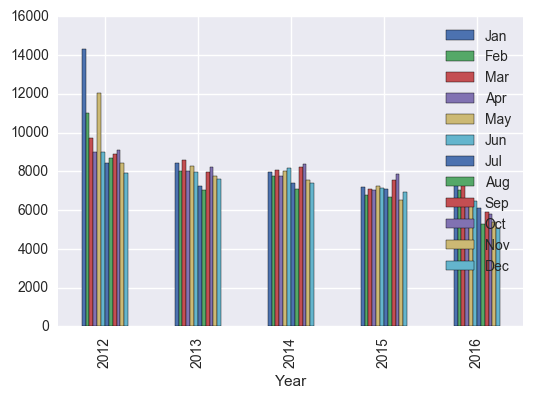

In [50]:
% pylab inline
df.plot.bar(x='Year')